# **Check coverage of CORDEX domains**

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore", category = UserWarning)

---
## **Plot domain boundaries from vertices**

In [2]:
from shapely.geometry import Polygon

# define the projection to display the map
mapproj = ccrs.PlateCarree()

# **SUSPECT THAT SOME OF THESE CODES ARE WRONG - CHECK AGAINST PREVIOUS STUDIES
domains = {"SAM" : {"vertices" : {"TLC":(273.26, 18.50), "TRC":(327.52, 17.23), "BRC" :(343.02, -54.6), "BLC" :(254.28, -52.66)},
                    "projection" : ccrs.RotatedPole(pole_longitude = -56.06, pole_latitude = 70.6, central_rotated_longitude=180),
                    "colour" : "red", 
                    "long_name" : "South America"},
           "CAM" : {"vertices" : {"TLC":(235.74, 28.79), "TRC":(337.78, 31.40), "BRC" :(329.46, -17.23), "BLC" :(246.10, -19.46)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 113.98, pole_latitude = 75.74),
                    "colour" : "gold", 
                    "long_name" : "Central America"},
           "NAM" : {"vertices" : {"TLC" :(189.26, 59.28), "TRC" :(336.74, 59.28), "BRC": (293.16, 12.55), "BLC" :(232.84, 12.56)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 83.0, pole_latitude = 42.5),
                    "colour" : "green", 
                    "long_name" : "North America"},
           "EUR" : {"vertices" : {"TLC" :(315.86-360, 60.21), "TRC" :(64.4, 66.65), "BRC" :(36.30, 25.36), "BLC" :(350.01-360, 22.20)},
                    "projection" : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
                    "colour" : "blue", 
                    "long_name" : "Europe"},
           "AFR" : {"vertices" : {"TLC" :(335.36, 42.24), "TRC" :(60.28, 42.24), "BRC" :(60.28, -45.76), "BLC" :(335.36, -45.76)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 180.0, pole_latitude = 90.0),
                    "colour" : "blue", 
                    "long_name" : "Africa"},
           "WAS" : {"vertices" : {"TLC" :(19.88, 43.5), "TRC" :(115.55, 41.0), "BRC" :(106.43, -15.23), "BLC" :(26.19, -12.97)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 236.66, pole_latitude = 79.95),
                    "colour" : "blue",
                    "long_name" : "South Asia"},
           "EAS" : {"vertices" : {"TLC" :(51.59, 50.50), "TRC" :(181.50, 50.31), "BRC" :(156.08, -0.24), "BLC" :(76.91, -0.10)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 296.3, pole_latitude = 61.0),
                    "colour" : "blue",
                    "long_name" : "East Asia"},
           "CAS" : {"vertices" : {"TLC" :(11.05, 54.76), "TRC" :(139.13, 56.48), "BRC" :(108.44, 19.39), "BLC" :(42.41, 18.34)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 256.61, pole_latitude = 43.48),
                    "colour" : "orange",
                    "long_name" : "Central Asia"},
           "AUS" : {"vertices" : {"TLC" :(110.19, 8.76), "TRC" :(182.02, 12.21), "BRC" :(206.57, -39.25), "BLC" :(89.25, -44.28)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 321.38, pole_latitude = -60.31, central_rotated_longitude=180),
                    "colour" : "orange",
                    "long_name" : "Australasia"},
           "ANT" : {"vertices" : {"TLC" :(140.58, -56.0), "TRC" :(245.58, -56.0), "BRC" :(326.14, -56.26), "BLC" :(60.02, -56.26)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 13.09, pole_latitude = -6.08, central_rotated_longitude=180),
                    "colour" : "orange",
                    "long_name" : "Antarctica"},
           "ARC" : {"vertices" : {"TLC" :(214.68, 55.43), "TRC" :(140.59, 52.53), "BRC" :(40.35, 46.06), "BLC" :(324.82, 52.0)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 0.0, pole_latitude = 6.55),
                    "colour" : "orange",
                    "long_name" : "Arctic"},
           "MED" : {"vertices" : {"TLC" :(339.79, 50.65), "TRC" :(50.85, 52.34), "BRC" :(38.33, 26.73), "BLC" :(353.96, 25.63)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 198.0, pole_latitude = 39.25),
                    "colour" : "orange",
                    "long_name" : "Mediterranean"},
           "MNA" : {"vertices" : {"TLC" :(333.0, 45.0), "TRC" :(76.0, 45), "BRC" :(76.0, -7), "BLC" :(333.0, -7)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 180.0, pole_latitude = 90.0),
                    "colour" : "orange",
                    "long_name" : "Middle East / North Africa"},
           "SEA" : {"vertices" : {"TLC" :(27.26, 89.26), "TRC" :(27.26, 146.96), "BRC" :(-14.81, 146.96), "BLC" :(-15.14, 89.26)},
                    "projection" : ccrs.RotatedPole(pole_longitude = 180.0, pole_latitude = 90.0),
                    "colour" : "orange",
                    "long_name" : "South-East Asia"}}

# convert lists of vertices to GeoDataFrame with associated plotting attributes
gdf = gpd.GeoDataFrame(index = domains.keys(),
                       geometry = [Polygon(shell = domains[k]["vertices"].values()) for k, v in domains.items()],
                       data = {"projection" : [v["projection"] for v in domains.values()],
                               "colour" : [v["colour"] for v in domains.values()]},
                       crs = mapproj)

In [4]:
# define the study region to test
xn, xx, yn, yx = [-85,-75,5,15]

# define domains to test
domains_to_plot = ["CAM", "SAM"]

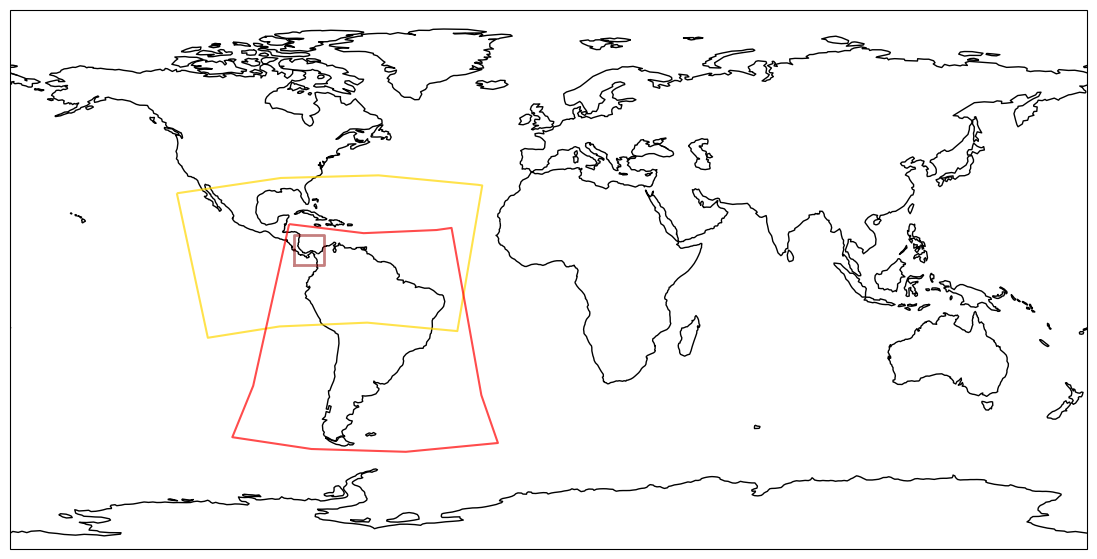

In [5]:
# draw the map
fig, ax = plt.subplots(figsize = (15,7), dpi = 100, subplot_kw = {"projection" : mapproj, "extent" : (-180,180,-90,90)})
ax.coastlines()

for r in domains_to_plot:   # currently plotting the most recent additions to make sure everything works
    dom = gdf.loc[[r]]
    dom.to_crs(dom.projection[0]).boundary.plot(ax = ax, transform = dom.projection[0], color = dom.colour[0], alpha = 0.7)
    
# plot the study region we want to use
ax.plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "darkred", lw = 2, alpha = 0.5)

---
## **CORDEX coordinate reference systems**

In [43]:
eur11 = { "CNRM-ALADIN63"                : ccrs.LambertConformal(central_longitude = 10.5, central_latitude = 49.5, standard_parallels = [49.5,]),
          "CLMcom-ETH-COSMO-crCLIM-v1-1" : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "DMI-HIRHAM5"                  : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "MOHC-HadREM3-GA7-05"          : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "SMHI-RCA4"                    : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "KNMI-RACMO22E"                : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "GERICS-REMO2015"              : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "ICTP-RegCM4-6"                : ccrs.LambertConformal(central_longitude = 9.75, central_latitude = 48.0, standard_parallels = [30., 65.], false_easting = -6000, false_northing = -6000, 
                                                                 globe = ccrs.Globe(semimajor_axis = 6371229.0, inverse_flattening = None)),
          "CLMcom-CCLM4-8-17"       : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25),
          "IPSL-WRF381P"            : ccrs.RotatedPole(pole_longitude = -162.0, pole_latitude = 39.25)
        }

sam22 = {'GERICS-REMO2015': ccrs.RotatedPole(pole_longitude = -56.06, pole_latitude = 70.6),
         'ICTP-RegCM4-7': ccrs.ObliqueMercator(central_longitude=-59.0, central_latitude=-22.0, false_easting=-12500.0, false_northing=-12500.0, 
                                               scale_factor=1.0, azimuth=89.999999,
                                               globe=cartopy.crs.Globe(semimajor_axis = 6371229.0, inverse_flattening = 0))}

    
sam44 = {'ICTP-RegCM4-3': ccrs.ObliqueMercator(central_longitude=-59.0, central_latitude=-22.0, false_easting=-12500.0, false_northing=-12500.0, 
                                               scale_factor=1.0, azimuth=89.999999,
                                               globe=cartopy.crs.Globe(semimajor_axis = 6371229.0, inverse_flattening = 0)),
         'MPI-CSC-REMO2009': ccrs.RotatedPole(pole_longitude = -56.06, pole_latitude = 70.6),
         'SMHI-RCA4': ccrs.RotatedPole(pole_longitude = -56.06, pole_latitude = 70.6),
         'UCAN-WRF341I': ccrs.RotatedPole(pole_longitude = -56.06, pole_latitude = 70.6)
        }

was22 = {'CLMcom-ETH-COSMO-crCLIM-v1-1' : ccrs.RotatedPole(pole_longitude=-123.4, pole_latitude = 79.95),
         'GERICS-REMO2015' : ccrs.RotatedPole(pole_longitude=-123.34, pole_latitude = 79.95), 
         'ICTP-RegCM4-7' : ccrs.ObliqueMercator(central_longitude=70.0, central_latitude=13.0, false_easting=-12500.0, false_northing=-12500.0, 
                                                      scale_factor=1.0, azimuth=89.999999, globe=None)
        }